# `context`.`random_automaton`

Generate a random automaton.  The states are guaranteed to be accessible, but some may be non coaccessible.

Arguments:
- `num_states`:
   The number of states wanted in the automata
   (>0).  All states will be connected, and there will be no dead
   state.  However, some might not be coaccessible.

- `density = 0.1`:
   The density of the automata.  This is the probability
   (between 0.0 and 1.0), to add a transition between two
   states.  All states have at least one outgoing transition,
   so \a d is considered only when adding the remaining transition.
   A density of 1 means all states will be connected to each other.

- `num_initial = 1`:
   The number of initial states wanted (0 <= num_initial <= num_states)

- `num_final = 1`:
   The number of final states wanted (0 <= num_final <= num_states)

- `max_labels = generators.size()`:
   The maximum number of labels per transition.  Defaults to the
   number of generators.

- `loop_chance = 0`:
   The probability (between 0.0 and 1.0) for each state to have
   a loop.
   
- `weights = ''`
   The specification string (following the format of [random_weight](context.random_weight.ipynb)) used
   to generate weights on each transitions.

Caveats:
- Even with `loop_change = 0` there can be loops.
- Because the random labels are not checked to be all different, it is possible to get fewer labels than there should.  For instance if dice decide for three labels, we can pick `a`, `b` and `a`, which results in only two labels.
- There is currently no randomization on the weights.

## Examples

In [1]:
import vcsn
import os
# Make sure we always get the same sequence of random automata.
os.environ["VCSN_SEED"] = "1"
b = vcsn.context('lal_char(abc), b')

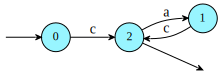

In [2]:
b.random_automaton(3)

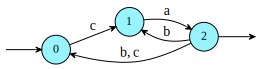

In [3]:
b.random_automaton(3)

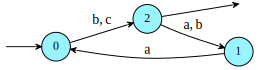

In [4]:
b.random_automaton(3)

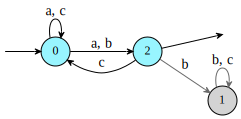

In [5]:
b.random_automaton(3)

Pushing the arguments to their limits guarantees the result.  For instance, a full density builds a clique.

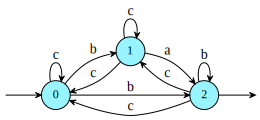

In [6]:
vcsn.context('lal(abc), b').random_automaton(3, density=1, max_labels=1)

All the states are initial, final, and have a loop.

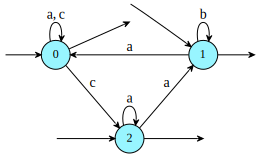

In [7]:
vcsn.context('lal(abc), b').random_automaton(3, max_labels=1, loop_chance=1, num_initial=3, num_final=3)

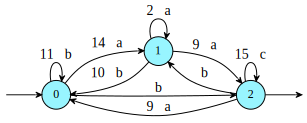

In [8]:
vcsn.context('lal(abc), z').random_automaton(3, max_labels=1, density=1, weights='1=0.2, 10=0.3, min=0, max=20')